<b><h3>Data Exploration</b></h3>

In [1]:
import pandas as pd
import numpy as np
#readfile
filename='C:/Users/User/Desktop/MASTER S2/DSC761/DATA FOR ASSINGMENT/bank.csv'
bank=pd.read_csv(filename,sep=',')
#read the top five of the dataset
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,output
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [2]:
#read the bottom five of the dataset
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,output
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In order to see the different datatypes that are available in this data set. By using the dtypes method, we can list the different columns available in the Dataframe along with their respective datatypes. For example, we can see that the 'job' column is an object datatype and the ‘balance’ column is an integer datatype. So, now we know which columns have integers in them and which columns have string data in them.

In [3]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
output       object
dtype: object

In [4]:
# import the seaborn module as sns
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(16.7,13.27)})

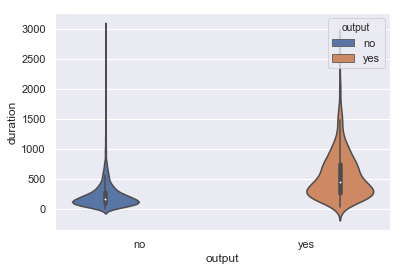

In [5]:
# plotting the violinplot
sns.violinplot(x="output",y="duration", hue="output", data=bank);
plt.show()

The above violin plot explain the relation between duration and the target output. The longer time duration for phone call, the result show that customer subscribe the term deposit.

<b><h3>Data Preparation</b></h3>

Data Preprocessing to change the data type object into integer due to the scikit learn only can determine if the dataset integer.
<br>atrribute need to be transforms are:</br>
<br>job          object</br>
<br>marital      object</br>
<br>education    object</br>
<br>default      object</br>
<br>housing      object</br>
<br>loan         object</br>
<br>contact      object</br>
<br>month        object</br>
<br>poutcome     object</br>
<br>output       object</br>

In [6]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
bank['job'] = le.fit_transform(bank['job'])
bank['marital'] = le.fit_transform(bank['marital'])
bank['education'] = le.fit_transform(bank['education'])
bank['default'] = le.fit_transform(bank['default'])
bank['housing'] = le.fit_transform(bank['housing'])
bank['loan'] = le.fit_transform(bank['loan'])
bank['contact'] = le.fit_transform(bank['contact'])
bank['month'] = le.fit_transform(bank['month'])
bank['poutcome'] = le.fit_transform(bank['poutcome'])
bank['output'] = le.fit_transform(bank['output'])
#display the initial records
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,output
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [7]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,output
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0
4520,44,2,2,2,0,1136,1,1,0,3,0,345,2,249,7,1,0


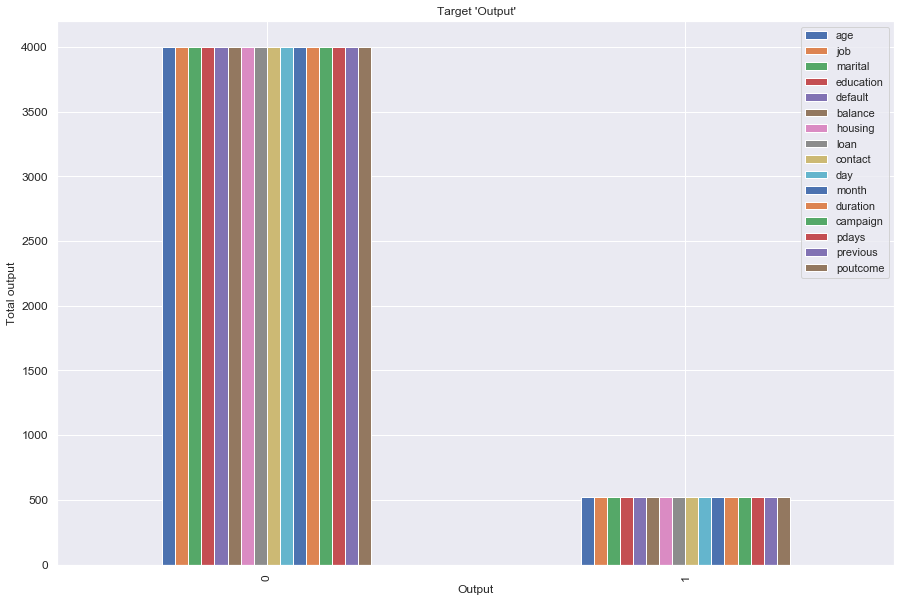

In [8]:
ax = bank.groupby('output').count().plot(kind='bar', title ="Target 'Output'", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Output", fontsize=12)
ax.set_ylabel("Total output", fontsize=12)
plt.show()

The above bar chart describe the target='output' is imbalance dataset. Due to this, undersampling is require to generate the target into balance dataset.

<b><h3>Undersampling<b></h3>

Unbalanced refers to highly unequal or uneven distribution of classes. This Imbalance can be reduced to a great extent by Under-sampling the majority class, label 0 and making it close to that of label 1. 

Identify the target

In [9]:
target='output'

Identify the length of the target value which is minority class.

In [10]:
minority_class_len=len(bank[bank[target]==1])
print(minority_class_len)

521


Identify the index of the target value which is majority class.

In [11]:
majority_class_indices = bank[bank[target]==0].index
print(majority_class_indices)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4510, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 4519, 4520],
           dtype='int64', length=4000)


Random majority is apply based on the length of minority class and there will be no replaced.

In [12]:
random_majority_indices = np.random.choice(majority_class_indices,
                                          minority_class_len,
                                          replace=False)
print(len(random_majority_indices))

521


Identify the index of minority class.

In [13]:
minority_class_indices = bank[bank[target]==1].index
print(minority_class_indices)

Int64Index([  13,   30,   33,   34,   36,   37,   38,   49,   50,   53,
            ...
            4433, 4447, 4458, 4465, 4484, 4494, 4503, 4504, 4505, 4511],
           dtype='int64', length=521)


combine the two target value (0 and 1) into the under sample indices.

In [14]:
under_sample_indices=np.concatenate([minority_class_indices,random_majority_indices])

store the new value of the target into under sample name.

In [15]:
under_sample=bank.loc[under_sample_indices]

Using the barplot to visualize the new target variable after the undersampling

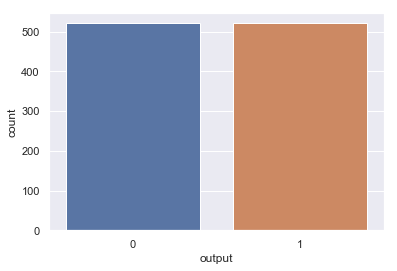

In [16]:
sns.countplot(x=target,data=under_sample)

The bar chart above explain the target variable has achieved the balance dataset.

<b><h3>Apply Machine Learning Algorithm</h3></b>

There are two Machine Learning have been applied are Logistic Regression and Random Forest Classifier.

Most data scientists that use Python for predictive modeling use the Python package called scikit-learn. Scikit-learn contains many built-in functions for analyzing the performance of models. Example: confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score.


The SciKit library provides a tool, called the Model Selection library. There’s a class in the library which is named ‘train_test_split.’ Using this we can easily split the dataset into the training and the testing datasets in various proportions.

In [17]:
import warnings
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

Warning is different from error in a program. If error is encountered, Python program terminates instantly. Warning on the other hand is not fatal. It displays certain message but program continues. Warnings are issued to alert the user of certain conditions which aren't exactly exceptions. Typically warning appears if some deprecated usage of certain programming element like keyword/function/class etc. is found.

Warning messages are displayed by warn() function defined in 'warning' module of Python's standard library. Warning is actually a subclass of Exception in built-in class hierarchy. There are a number of built-in Warning subclasses. User defined subclass can also be defined.

In [18]:
%matplotlib inline
rcParams['figure.figsize'] =10,6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

function generate model report is to give useful information result of confusion matrix (Accuracy, Precision, Recall and F1 Score).

In [19]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " ,accuracy_score(y_actual,y_predicted))
    print("Precision = " ,precision_score(y_actual,y_predicted))
    print("Recall = " ,recall_score(y_actual,y_predicted))
    print("F1 Score = " ,f1_score(y_actual,y_predicted))
    pass

function generate auc roc curve is to give useful information result of ROC Graph.

In [20]:
def generate_auc_roc_curve(clf,X_test):
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

Redefine the X (other variable except target) and Y for target.

In [21]:
X=under_sample.loc[:,bank.columns!=target]
Y=under_sample.loc[:,bank.columns==target]

identify the X, Y and the testing 30% 

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

1    521
0    521
Name: output, dtype: int64


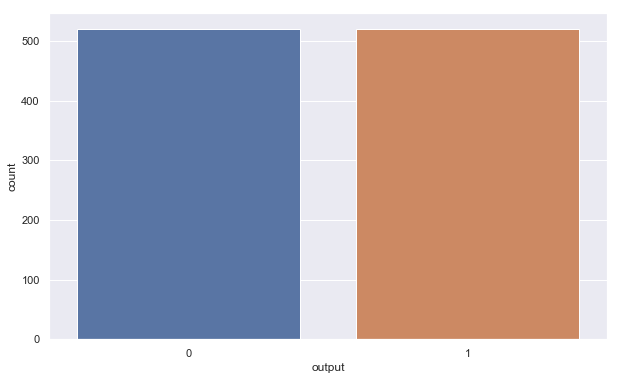

In [23]:
ax=sns.countplot(x=target, data=under_sample)
print(under_sample[target].value_counts())

The above bar plot show the target value 521.

In [24]:
100*(521/float(under_sample.shape[0]))

50.0

To determine the target percentage for target

In [25]:
100*(521/float(under_sample.shape[0]))

50.0

Identify the Train target total amount.

In [26]:
Y_train[target].value_counts()

0    375
1    354
Name: output, dtype: int64

<b><h3>Logistic Regression</b></h3>

In [27]:
logreg=LogisticRegression().fit(X_train,Y_train)

In [28]:
Y_Test_Pred=logreg.predict(X_test)

show the result of performance model logistic regression 

In [29]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.7699680511182109
Precision =  0.7987421383647799
Recall =  0.7604790419161677
F1 Score =  0.7791411042944786


show the result of performance ROC graph logistic regression 

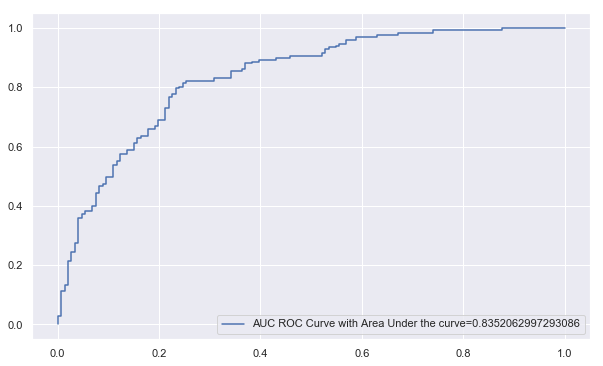

In [30]:
generate_auc_roc_curve(logreg,X_test)

<b><h3>Random Forest</b></h3>

In [31]:
#Create a Gaussian Classifier
RF=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
RF.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
Y_Test_Pred=RF.predict(X_test)

show the result of performance model Random Forest

In [33]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.7987220447284346
Precision =  0.8095238095238095
Recall =  0.8143712574850299
F1 Score =  0.8119402985074626


show the result of performance ROC graph Random Forest 

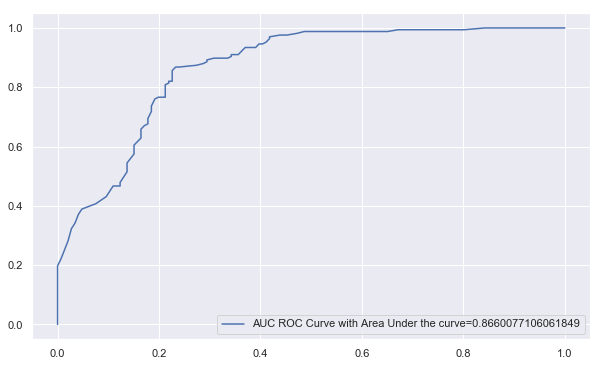

In [34]:
generate_auc_roc_curve(RF,X_test)

<b><h3>Evaluation</b></h3>

Comparison between Logistic Regression and Random Forest. It shows that Random Forest (81.15%) have overcome the Logistic Regression (78.59%) accuracy. Next, the precision of the RF (83.78%) highest than LR (80.68%). Confusion matrix is the important to determine the best prediction model.

In additional, the Receiver Operating Characteristic (ROC) curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold.
Based on comparison between two ROC, it shows that ROC Random Forest is the best performance.

The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two characteristic.

This below show the heatmap correlation before undersampling process

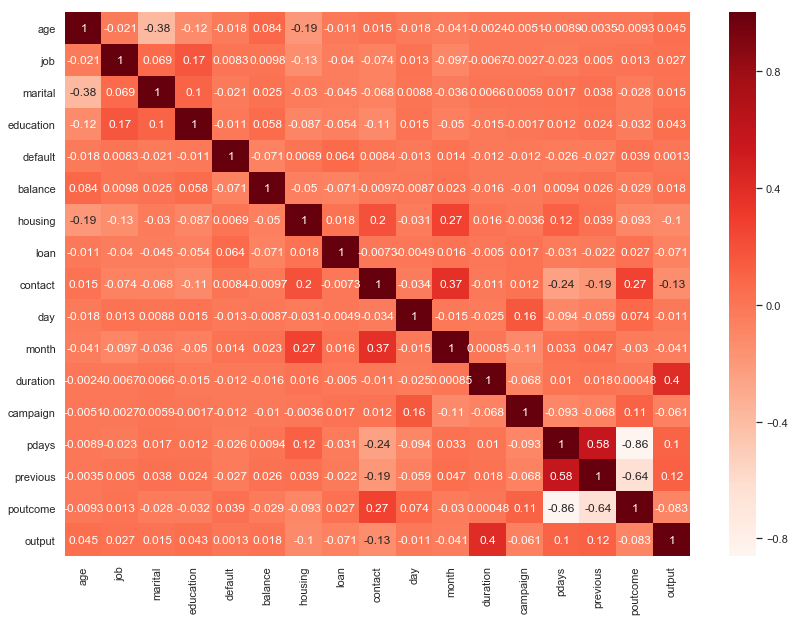

In [35]:
#Using Pearson Correlation
plt.figure(figsize=(14,10))
cor = bank.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

This below show the heatmap correlation after undersampling

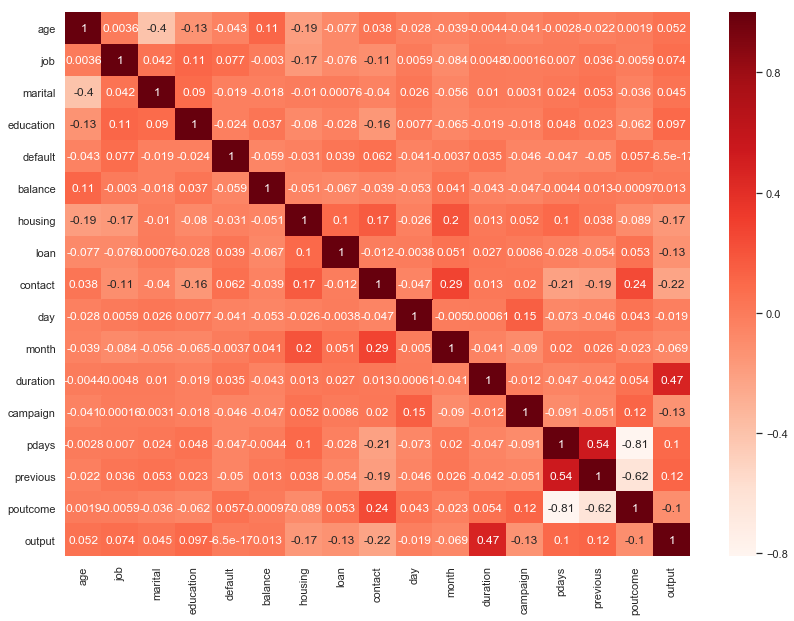

In [36]:
#Using Pearson Correlation
plt.figure(figsize=(14,10))
cor = under_sample.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()